<a href="https://colab.research.google.com/github/Niketha11/CODESOFT/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os



**IMPORTING** **THE** **DATASET**

In [2]:
df=pd.read_csv("/content/IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**DATA EXPLORATION**

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.shape

(150, 5)

In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

**DATA VISUALIZATION**

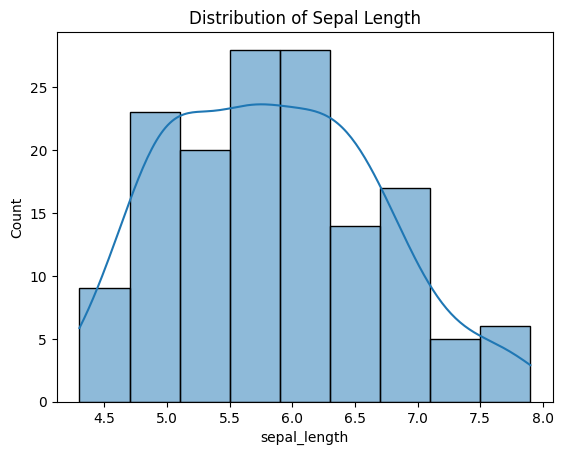

In [25]:



sns.histplot(df['sepal_length'], kde=True)
plt.title('Distribution of Sepal Length')
plt.show()



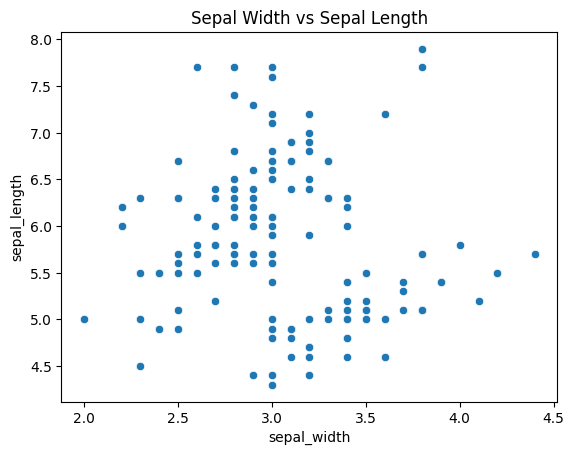

In [12]:
# Scatter plot for sepal width vs sepal length
sns.scatterplot(x='sepal_width', y='sepal_length', data=df)
plt.title('Sepal Width vs Sepal Length')
plt.show()

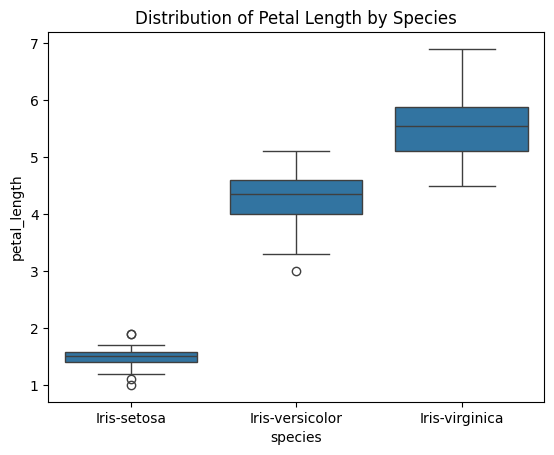

In [14]:

sns.boxplot(x='species', y='petal_length', data=df)
plt.title('Distribution of Petal Length by Species')
plt.show()


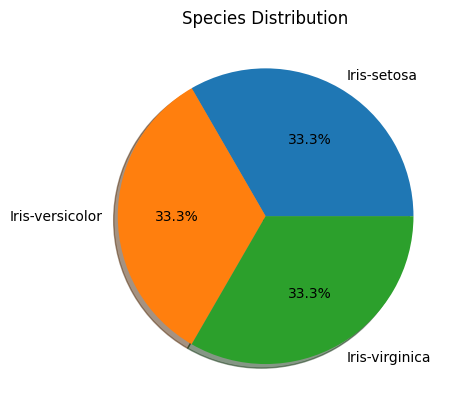

In [15]:
labels = df['species'].value_counts().index.to_list()
sizes = df['species'].value_counts().to_list()
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax.set_title('Species Distribution')
plt.show()

**FEATURE SELECTION**

In [16]:
x=df.drop("species",axis=1)
y=df["species"]

**SPLITTING TRAIN & TEST DATA**

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

**K** **NEAREST** **NEIGHBOUR** **CLASSIFIER**

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [20]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [22]:
y_pred_knn=model.predict(x_test)

In [24]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test,y_pred_knn))
print(accuracy_score(y_test,y_pred_knn))
print(confusion_matrix(y_test,y_pred_knn))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

1.0
[[17  0  0]
 [ 0 15  0]
 [ 0  0 13]]
